# Лабораторная работа № 4. Кривые обучения и регуляризации

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn import metrics

In [196]:
df = pd.read_csv("boston_house_prices.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [197]:
train, test = train_test_split(df, test_size=0.2)

feats = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X_train = train[feats]
Y_train = train[['MEDV']]

X_test = test[feats]
Y_test = test[['MEDV']]

Модель линейной регрессии с нормальным распределением

In [198]:
model1 = LinearRegression(fit_intercept=True)

model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)

Её кривая обучения

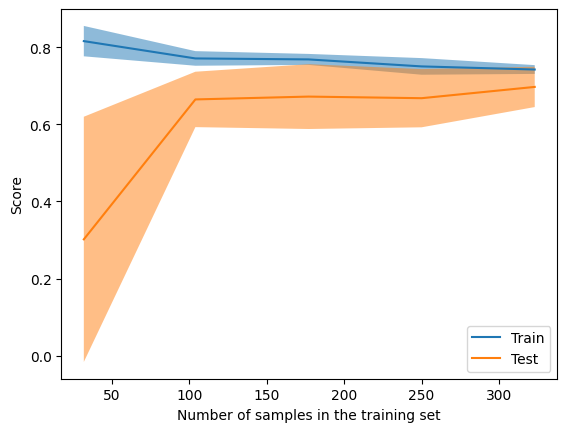

In [199]:
LearningCurveDisplay.from_estimator(model1, X_train, Y_train)
plt.show()

Модель Ridge

In [200]:
model2 = Ridge(alpha=1.0, fit_intercept=True)

model2.fit(X_train, Y_train)

Y_pred2 = model2.predict(X_test)

Её кривая обучения

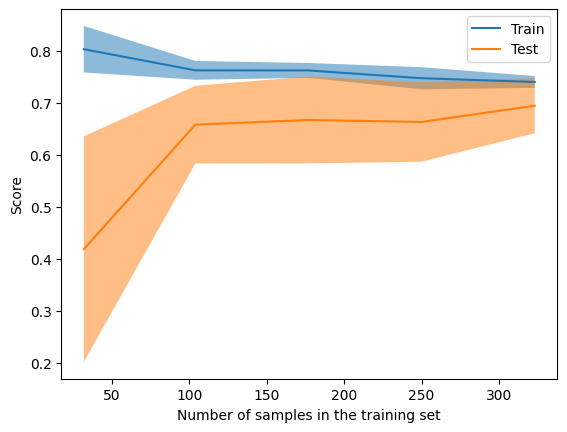

In [201]:
LearningCurveDisplay.from_estimator(model2, X_train, Y_train)
plt.show()

Из этих графиков я делаю вывод, что для данного датасета лучше подойдёт модель Ridge при малом количестве наблюдений. При больших же количествах разница между ними заключается в том, что у Ridge ошибка (зона вне кривой) больше, чем у линейной регрессии

Если бы была переобученность, то мы бы заметили высокие показатели train при любых количествах наблюдений, но при этом малые значения test

В случае же недообученности показатели были бы низкими как для train, так и для test

Из кривых видно, что при достаточном количестве наблюдений обе метрики имеют хорошие показатели как при test, так и при train, следовательно модели хорошо обучены

Модель Lasso

In [219]:
model3 = Lasso(alpha=1.0, fit_intercept=True)

model3.fit(X_train, Y_train)

Y_pred3 = model3.predict(X_test)

Модель ElasticNet

In [220]:
model4 = ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True)

model4.fit(X_train, Y_train)

Y_pred4 = model4.predict(X_test)

Сравним все эти модели по их метрикам

In [221]:
metrics.mean_absolute_error(Y_test, Y_pred1)

3.3489868482908944

In [222]:
metrics.mean_absolute_error(Y_test, Y_pred2)

3.400976255396305

In [223]:
metrics.mean_absolute_error(Y_test, Y_pred3)

3.7068213766602907

In [224]:
metrics.mean_absolute_error(Y_test, Y_pred4)

3.705690419068061

In [225]:
metrics.mean_absolute_percentage_error(Y_test, Y_pred1)

0.17603173208860498

In [226]:
metrics.mean_absolute_percentage_error(Y_test, Y_pred2)

0.18030534155188074

In [227]:
metrics.mean_absolute_percentage_error(Y_test, Y_pred3)

0.18874513628829223

In [228]:
metrics.mean_absolute_percentage_error(Y_test, Y_pred4)

0.18946173224253143

In [229]:
metrics.r2_score(Y_test, Y_pred1)

0.7196443964741679

In [230]:
metrics.r2_score(Y_test, Y_pred2)

0.7088082390995235

In [231]:
metrics.r2_score(Y_test, Y_pred3)

0.6571482144156946

In [232]:
metrics.r2_score(Y_test, Y_pred4)

0.6590462858719692

Судя по метрикам, наихудшей оказалась модель Lasso, а наилучшей - Ridge, хотя её преимущество не столь велико

Единая таблица весовых коэффициентов

In [233]:
coef_table = pd.DataFrame.from_dict({"LinReg": model1.coef_.tolist()[0], "Ridge": model2.coef_.tolist(), "Lasso": model3.coef_.tolist(), "ElasticNet": model4.coef_.tolist()})
coef_table

,LinReg,Ridge,Lasso,ElasticNet
0,-0.116691,-0.113373,-0.082775,-0.096061
1,0.055968,0.056955,0.059509,0.061643
2,0.047641,0.015964,-0.000000,0.000000
3,3.427872,3.421730,0.000000,0.000000
4,-16.764281,-8.990674,-0.000000,-0.000000
5,3.443772,3.449892,0.739877,0.868116
6,0.009658,0.002727,0.030215,0.030235
7,-1.521472,-1.413096,-0.837222,-0.868887
8,0.331353,0.311382,0.288427,0.321663
9,-0.013414,-0.013968,-0.015890,-0.017047


Матрица корреляции

In [234]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Можно сделать следующие выводы:

1. Признаки TAX (налог) и RAD (доступность радиальных дорог) имеют очень сильную корреляцию
2. MEDV (цена на дом) имеет большую обратную зависимость от LSTAT (низкий статус населения) и заметную прямую зависимость от RM (кол-во комнат)
3. Меньше всего MEDV зависит от CHAS (наличие реки)
4. Для моделей Lasso и ElasticNet оказались значимы признаки:
    - RM
    - DIS (расстояние до центров занятости)
    - RAD
    - PTRATIO (соотношение учеников и учителей)
    - LSTAT
5. Для моделей LinearRegression и Ridge оказались значимы признаки:
    - CHAS
    - NOX (концентрация оксидов азота)
    - RM
    - DIS
    - TAX
    - PTRATIO
    - LSTAT
6. Следующие признаки оказались либо совсем, либо почти не значимы для изученных моделей:
    - CRIM (уровень преступности)
    - ZN (доля зонированной земли)
    - INDUS (акры не для розничной торговли)
    - AGE (доля старых домов)
    - TAX (налог)
    - B (доля чернокожего населения)
